# Segunda Entrega
---

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/2/26/Spotify_logo_with_text.svg" width = 50% high = 50%><center>

## Índice
---

* [1. Introducción](#intro)
* [2. Contexto](#contexto)
* [3. Preguntas de interés](#preguntas)
* [4. Primera inspección de los datos](#inspeccion)
* [5. Data Cleaning](#cleaning)
    * [5.1. Datos nulos](#nulos)
    * [5.2. Datos duplicados](#duplicados)
* [6. Data Wrangling](#wrangling)
* [7. Popularidad](#popularidad)
    * [7.1. Géneros](#pop_generos)
    * [7.2. Artistas](#pop_artistas)
    * [7.3. Canciones](#pop_canciones)
* [8. Duración](#duracion)
* [9. Bailabilidad](#baile)
* [10. Palabra hablada](#hablada)
* [11. Letras explícitas](#explicito)
* [12. Evolución con el tiempo](#tiempo)
* [13. Insights y recomendaciones](#insights)

## 1. Introducción <a class="anchor" id="intro"></a>
---
Spotify es una aplicación multiplataforma, nacida en Suecia en 2006, aunque tiene su sede en Londres. Actualmente, es la plataforma de música en streaming más popular del mundo, debido a los acuerdos firmados con algunas de las compañías discográficas internacionales más importantes.
Es importante tener en cuenta que el término streamig se refiere a la distribución de contenido multimedia (radio, televisión y eventos en vivo), a través del uso de Internet.

Es el resultado de unir los dos grandes gustos de su creador, Daniel EK, y darle una perspectiva empresarial. Gracias a su idea de fusionar la música con la tecnología, ahora tenemos una de las plataformas de música digital más grandes y mejores del mundo.
El consumo de contenidos multimedia está creciendo rápidamente a medida que evoluciona la sociedad de la información. Actualmente, plataformas como Spotify han logrado posicionarse como un negocio estable, serio y rentable, gracias a la protección que brindan a la industria musical. Por otro lado, aquellos que encuentran en la música una forma dinámica y entretenida de pasar el tiempo, se han convertido en los mayores fanáticos de esta innovadora herramienta en la actualidad. Esto se debe a sus múltiples beneficios, que conforman sus principales características.

Estos servicios deben atraer clientes y mantenerlos interesados mediante el uso sencillo e intuitivo de sus sistemas, de forma que les premita acceder a sus artistas y canciones favoritas mientras descubren nuevos géneros y tendencias musicales. Para dicha tarea son cruciales los sistemas de clasificación y recomendación de canciones en función de los gustos y preferencias de los clientes. En este terreno los algoritmos de aprendizaje automático lucen toda su potencia.

En el presente trabajo analizaremos una selección de canciones del servicio Spotify. Para ello, se realizará un análisis exploratorio para evaluar si la aplicación de algoritmos de clasificación y de clustering nos permitirian cumplir nuestros objetivos.
[Introduccion](https://vidabytes.com/en/que-es-spotify/)

## 2. Contexto <a class="anchor" id="contexto"></a>
---
Con el proposito de retener y obtener nuevos clientes, Spotify debde de tener una gran seleccion de generos musicales, tambien debe de contar con una interfaz sencilla y facil de utilizar. Pero a su vez necesita contar con un sistema de recomendaciones de contenido.
Esto para lograr que usuarios puedan conocer mas artistas, canciones y contenido en la plataforma. Esto ayuda a que podamos hacer crecer los usuarios en la plataforma.

Es aqui donde nace la idea de crear un sistema de recomendacion de contenido y clasificacion en base a gustos de los usuarios del servicio. Todo esto para poder dar visibilidad a canciones recien ingresadas al sistema y poder dar presencia a nuevos temas.

Este sistema se basara en las variables y relaciones entre cada tema con mayor gusto, asi como diferentes datos que son mostrados en el dataset a analizar.

## 3. Preguntas de interés <a class="anchor" id="preguntas"></a>
---

Se plantean una serie de hipótesis que serán resueltas por medio del análisis exploratorio de datos. Estas hipótesis buscan dar lugar a conclusiones que lleven a una mejor comprensión del comportamiento general de los clientes del servicio. Además, estas preguntas pueden dar lugar a un mejor sistema de clasificación y/o recomendación.

* ¿Cuáles son los géneros más populares?
* ¿Cuáles son los artistas más populares?
* ¿Todas las piezas musicales poseen voz cantada? ¿O existen piezas en dónde la voz es hablada?
* ¿Qué proporción de las canciones se las puede clasificar como bailables?
* ¿Qué porcentaje de las canciones tienen letras explícitas?
* ¿Cúal es la duración promedio de las canciones?
* ¿Las variables que clasifican las canciones varían con los años? ¿Hay alguna tendencia que nos permitar dar alguna idea de las preferencias futuras?

Estas hipótesis no serán respondidas en el orden en el que fueron planteadas sino de manera orgánica a medida que los datos son analizados.

## 4. Primera inspección de los datos <a class="anchor" id="inspeccion"></a>
---

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import median
from wordcloud import WordCloud

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/CoderHouseDataScience/Coder House Data Science/DS/dataset.csv')
df_api = pd.read_csv('/content/drive/My Drive/CoderHouseDataScience/Coder House Data Science/DS/Spotify_API.csv')

Llamaremos al dataset "df" como el dataset "original", mientras que al dataset "df_api" como el dataset extraído desde la API.

In [6]:
print(df.shape, df_api.shape)

(114000, 21) (8598, 19)


In [7]:
df.head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


In [8]:
df_api.head(1)

,Unnamed: 0,year,artist,track,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,1980,AC/DC,You Shook Me All Night Long,2SiXAy7TuUkycRVbbWDEpo,80,0.532,0.767,7,-5.509,1,0.0574,0.00287,0.000513,0.39,0.755,127.361,210173,4


Ambos dataset poseen estructura muy similar, compartiendo muchas de las variables. Entre las variables presentes se encuentra el nombre de la canción, su intérprete, álbum, duración y una serie de parámetros numéricos que dan información sobre el volumen, la energía que transmite, el carácter instrumental, la presencia de palabra hablada o cantanda, entre otras. La principal diferencia es que la base de datos extraída desde la API no incluye el género musical al que pertenecen las canciones. A continuación se describen las variables
Descripcion de las 21 Columnas/Variables:

*   **track_id:** La ID de Spotify para la pista
*   **artistas:** Los nombres de los artistas que interpretaron la canción. Si hay más de un artista, están separados por un ;
*   **album_name:** El nombre del álbum en el que aparece la pista
*   **track_name:** Nombre de la pista
*  **Popularidad:**La popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y qué tan recientes son esas reproducciones. En términos generales, las canciones que se están reproduciendo mucho ahora tendrán una mayor popularidad que las canciones que se tocaron mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma pista de un single y un álbum) se clasifican de forma independiente.
*   **duration_ms:** La longitud de la pista en milisegundos
*   **explícito:** Si la pista tiene o no letras explícitas (verdadero = sí lo hace; falso = no, no lo hace O desconocido)
*   **bailabilidad:** La bailabilidad describe qué tan adecuada es una pista para bailar basada en una combinación de elementos musicales que incluyen tempo, estabilidad rítmica, fuerza de ritmo y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable
*  **Energía:** La energía es una medida de 0.0 a 1.0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, ruidosas y ruidosas. Por ejemplo, el death metal tiene alta energía, mientras que un preludio de Bach tiene una puntuación baja en la escala.
* **clave:** La clave en la que se encuentra la pista. Los enteros se asignan a los tonos utilizando la notación estándar de clase de tono. Por ejemplo, 0 = C, 1 = C♯/D, 2 = D♭, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1
* **Sonoridad:** La sonoridad total de una pista en decibelios (dB)
* **modo:** El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0
* **Speechiness:** detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente como el discurso sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1.0 estará el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente están hechas completamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener música y voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representan música y otras pistas no similares al habla
* **acústica:** Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica
* **instrumentalidad:** predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" son tratados como instrumentales en este contexto. Las pistas de rap o palabra hablada son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1.0, mayor será la probabilidad de que la pista no contenga contenido vocal.
* **liveness:** Detecta la presencia de una audiencia en la grabación.Los valores de vida más altos representan una mayor probabilidad de que la pista se haya realizado en vivo. Un valor por encima de 0,8 proporciona una gran probabilidad de que la pista esté activa
* **valencia:** Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, triste, deprimido, enojado)
* **tempo:** El tempo total estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza dada y deriva directamente de la duración promedio del compás.
* **time_signature:** Una firma de tiempo estimada. La firma de tiempo (metro) es una convención notacional para especificar cuántos latidos hay en cada barra (o medida). La firma de tiempo varía de 3 a 7 indicando firmas de tiempo de 3/4, a 7/4.
* **track_genre:** El género al que pertenece la pista

In [9]:
print(df['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [10]:
df.groupby('track_genre').size()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Length: 114, dtype: int64

Se observa que el dataset original está compuesto por mil canciones de cada género musical, esto puede ser positivo por implica que ningun género quede subrepresentado. Leyendo la lista de géneros presentes en el dataset encontramos los géneros más masivos, al menos en Argentina, por ejemplo: rock, pop, hip-hp, latino, reggae, reggaeton, etcétera. Además, el número de canciones es suficiente para obtener buenos parámetros estadísticos de cada género que asistan posteriormente a la formación de un sistema de clasificación.

## 5. Data Cleaning <a class="anchor" id="cleaning"></a>
---

El funcionamiento de los algoritmos depende de poseer información libre de valores nulos y repetidos, las siguientes dos subsecciones se focalizan rápidamente en dichos asuntos.

### 5.1. Datos nulos <a class="anchor" id="nulos"></a>

In [11]:
df = df.dropna()

### 5.2. Datos duplicados <a class="anchor" id="duplicados"></a>

In [12]:
df.duplicated(subset = ['track_id']).value_counts()

False    89740
True     24259
dtype: int64

In [13]:
df = df.drop_duplicates(subset = ['track_id'])

El total de canciones repetidas en el dataset original asciende a 24259, de un total de 114.000, lo cual es el 21% del dataset, un número realmente alto. Sin embargo, al igual que con los valores tipo NaN, borramos los valores repetidos en el dataset. El dataset extraído desde la API posee intrínsicamente valores duplicados, dado que se creó a partir de las canciones más populares de cada año, es decir, hay canciones que fueron populares durante más de un año.

## 6. Data Wrangling <a class="anchor" id="wrangling"></a>
---

In [14]:
def wrangling(data):

    if 'track_id' in data.columns:
        data.drop(['Unnamed: 0', 'track_id'], axis = 1, inplace = True)

        # Eliminamos los artistas secundarios
        data[['artists', 'artists_1']] = data['artists'].str.split(';', n = 1, expand = True)
        data.drop('artists_1', axis = 1, inplace = True)

    else:
        data.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
        data.rename(columns = {'artist':'artists'}, inplace = True)

    # Pasamos de ms a minutos
    data['duration_min'] = (data['duration_ms']/(60 * 1000)).round(2)
    data.drop('duration_ms', axis = 1, inplace = True)

    # Expresamos el volumen en números positivos
    data['loudness_db'] = - data['loudness']
    data.drop('loudness', axis = 1, inplace = True)

    # Clasificamos según speechiness
    group_names = ['Music', 'Mixed', 'Spoken']
    data['speechiness'] = pd.cut(data['speechiness'], [0, 0.33, 0.66, 1], labels = group_names, include_lowest = True)

    # Clasificamos según danceablility
    group_names = ['No bailable', 'Bailable']
    data['danceable'] = pd.cut(data['danceability'], [0, 0.75, 1], labels = group_names, include_lowest = True)

    return data

In [15]:
df = wrangling(df)
df_api = wrangling(df_api)

Se eliminaron las columnas "Unnamed: 0", "track_id" que sólo indica el número de fila y que identifica la canción en el servicio Spotify, respectivamente. Se expresó la duración de las canciones en minutos (en lugar de milisegundos) y se modificó la columna "loudness" para que informe valores positivos. En el caso que una canción posea más de un intérprete, la columna "artists" presenta a los artistas separados por punto y coma (;), por ello se separa las artistas y se selecciona sólo el principal. Por otro lado "speechiness" detecta la presencia de palabra hablada. Mientras más palabra hablada posea (talk show, audiobook, poesía), más cerca de 1 estará el valor. Valores entre 0.33 y 0.66 describen piezas musicales con carácter mixto entre música y palabra hablada. Valores por debajo de 0.33 representan música y otros temas con voz cantada. Con tales rangos crearemos una clasificación cualitativa, con la idea de simplificar el análisis. De forma similar, se clasificó las canciones como bailables (danceable) o no, fijanto arbitrariamente como bailables a aquellas canciones con valores de "danceablity" mayores a 0,75.

## 7. Popularidad <a class="anchor" id="popularidad"></a>
---

En esta sección se analizan los géneros, artistas y canciones de mayor popularidad.

### 7.1. Géneros <a class="anchor" id="pop_generos"></a>

In [16]:
print('Hay {} géneros en el dataset.'.format(df['track_genre'].unique().size))

Hay 113 géneros en el dataset.


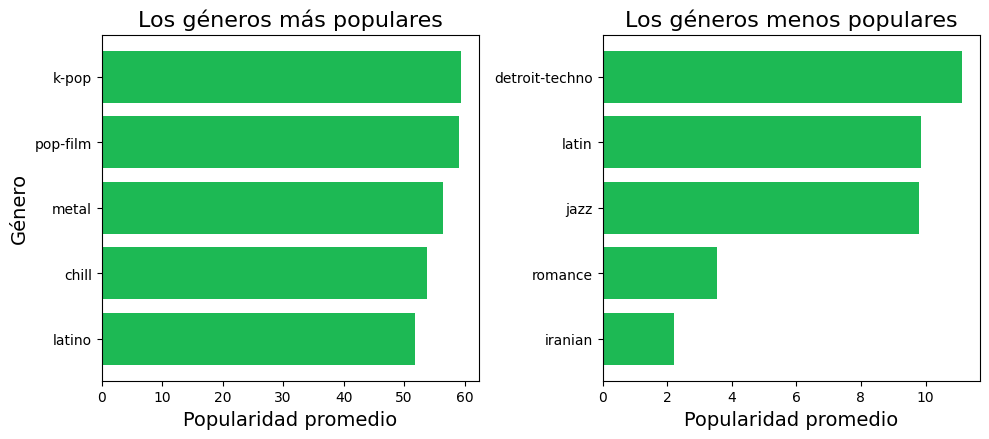

In [17]:
popularity_mean = df['popularity'].groupby(df['track_genre']).mean()
most_popular_genres = popularity_mean.sort_values(ascending = False).head(5)
least_popular_genres = popularity_mean.sort_values(ascending = False).tail(5)

fig, axs = plt.subplots(1, 2, figsize = (10, 4.5))

axs[0].barh(most_popular_genres.index[::-1], most_popular_genres[::-1], color = '#1DB954')
axs[1].barh(least_popular_genres.index[::-1], least_popular_genres[::-1], color = '#1DB954')

axs[0].set_xlabel('Popularidad promedio', fontsize = 14)
axs[1].set_xlabel('Popularidad promedio', fontsize = 14)
axs[0].set_ylabel('Género', fontsize = 14)
axs[1].set_title('Los géneros menos populares', fontsize = 16)
axs[0].set_title('Los géneros más populares', fontsize = 16)

plt.tight_layout()
# plt.savefig('Popularidad genero.jpg', dpi = 300)
plt.show()

Se observa que 113 géneros componen el dataset, presentando géneros tan diversos tales como "k-pop", "detroit-techno" y "chill". Los géneros de mayor popularidad promedio poseen todos más de 50 puntos, presentando diversidad de géneros. Dicha diversidad tambien está presente en los géneros menos populares, poseeyendo valores en torno los 10 puntos de popularidad promedio.

### 7.2. Artistas <a class="anchor" id="pop_artistas"></a>

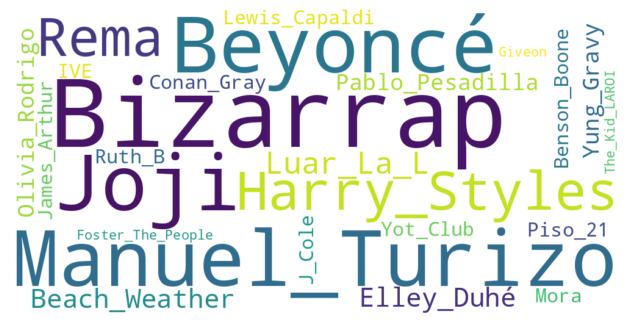

In [18]:
popular_artists = df['popularity'].groupby(df['artists']).mean()
most_popular_artists = popular_artists.sort_values(ascending = False).head(25)

text = list(most_popular_artists.index)
text2 = [text[i].replace(' ', '_').replace('.', '') for i in range(len(text))]
string = (" ").join(text2)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
# plt.savefig('Popularidad artistas.jpg', dpi = 300)
plt.show()

El Word Cloud muestra los 25 artistas más populares del dataset original, la mayoría de ellos son artistas vigentes y de gran difusión en la actualidad. Esto ilustra en gran medida los gustos de los oyentes, dando una idea aproximada de los artistas que más seran solicitados al algoritmo de recomendación de canciones.

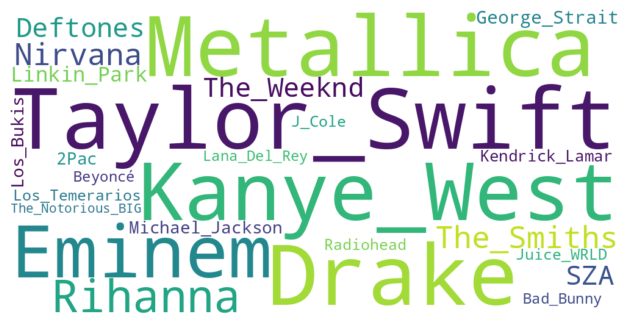

In [19]:
alltime_popular_artists = df_api['artists'].value_counts().head(25)

text = list(alltime_popular_artists.index)
text2 = [text[i].replace(' ', '_').replace('.', '') for i in range(len(text))]

string = (" ").join(text2)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.tight_layout()
# plt.savefig('Popularidad artistas api.jpg', dpi = 300)
plt.show()

Por otro lado, este Word Cloud obtenido a partir del dataset obtenido por medio de la API muestra los 25 artistas más populares entre los años 1980 y 2022. Este muestra artistas de diferentes décadas, tales como Metallica, Nirvana,  Taylor Swift kanye Westm Eminem y Drake. Estos artistas son siempre escuchados y de relevancia.

### 7.3. Canciones <a class="anchor" id="pop_canciones"></a>

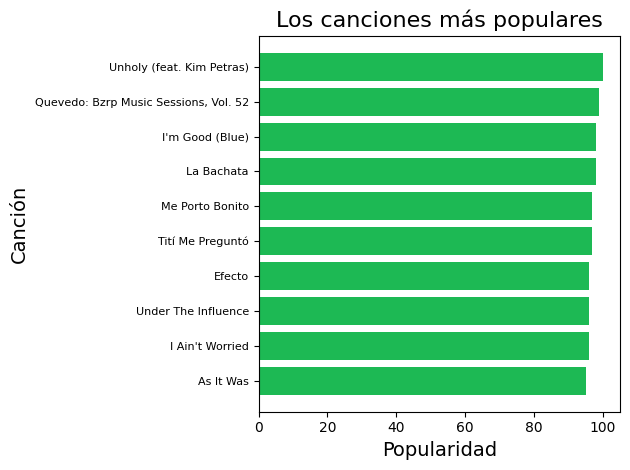

In [20]:
df2 = df[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(10)

plt.barh(df2['track_name'][::-1], df2['popularity'][::-1], color = '#1DB954')
plt.xlabel('Popularidad', fontsize = 14)
plt.ylabel('Canción', fontsize = 14)
plt.yticks(fontsize = 8)
plt.title('Los canciones más populares', fontsize = 16)

plt.tight_layout()
# plt.savefig('Popularidad canciones.jpg', dpi = 300)
plt.show()

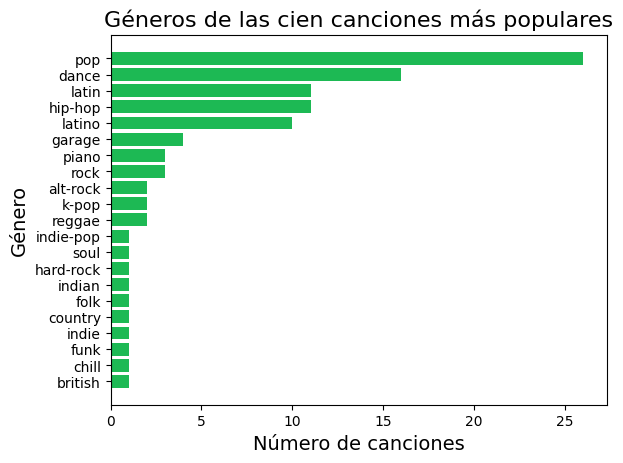

In [21]:
df3 = df[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(100)
popular_songs_genre = df3['track_genre'].value_counts()

plt.barh(popular_songs_genre.index[::-1], popular_songs_genre[::-1], color = '#1DB954')
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Género', fontsize = 14)
plt.title('Géneros de las cien canciones más populares', fontsize = 16)
# plt.savefig('Popularidad genero 2.jpg', dpi = 300)
plt.show()

Por otro lado, si analizamos las canciones más populares y los géneros de dichas canciones, encontramos que en su mayoría que estas canciones pertenecen a los géneros "pop", "dance", "latin" y "latino". Estas canciones, en general son buscadas por su altos valores de "valence" y "danceability", es decir, son canciones muy bailables y que en general transmiten emociones positivas.  

## 8. Duración <a class="anchor" id="duracion"></a>
---

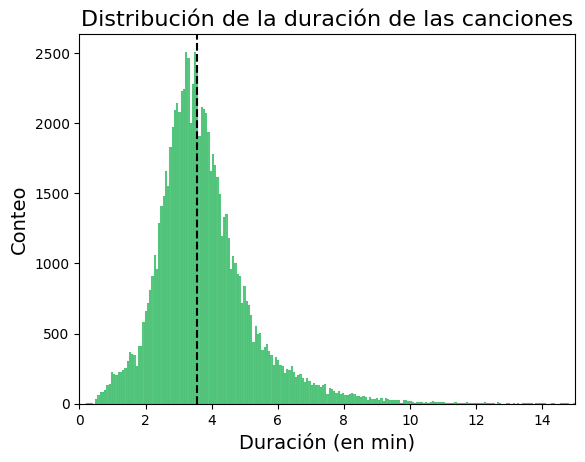

In [22]:
sns.histplot(df['duration_min'], color = '#1DB954')
plt.axvline(median(df['duration_min']), c = 'black', ls = '--')
plt.xlim(0, 15)
plt.xlabel('Duración (en min)', fontsize = 14)
plt.ylabel('Conteo', fontsize = 14)
plt.title('Distribución de la duración de las canciones', fontsize = 16)
# plt.savefig('Duracion.jpg', dpi = 300)
plt.show()

La duración de las canciones presenta esta distribución, con una mediana en torno a los 3,6 minutos, aunque hay canciones que superan holgadamente los 15 minutos que abarca este gráfico.

## 9. Bailabilidad <a class="anchor" id="baile"></a>
---

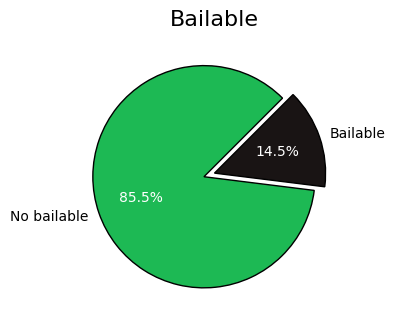

In [23]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df.groupby('danceable').size(), labels = ('No bailable', 'Bailable'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Bailable', fontsize = 16)
plt.tight_layout()
# plt.savefig('Bailabilidad.jpg', dpi = 300)
plt.show()

Se observa que sólo un 14,5 % de las canciones del dataset original se clasificaron como bailables, sin embargo estas canciones son las más populares. Esto quiere decir, que las canciones más demandas al servicio muy probablemente son las que más se disfrutan bailando, pero que sin embargo estás canciones no contienen a todo el universo de las canciones solicitadas.

## 10. Palabra hablada (Speechiness) <a class="anchor" id="hablada"></a>
---

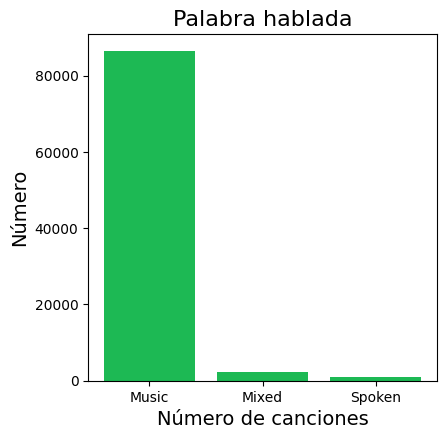

In [24]:
plt.figure(figsize = (4.5, 4.5))
plt.bar(df.groupby('speechiness').size().index, df.groupby('speechiness').size(), color = '#1DB954')
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Número', fontsize = 14)
plt.title('Palabra hablada', fontsize = 16)
# plt.savefig('Palabra hablada.jpg', dpi = 300)
plt.show()

La gran mayoría de las canciones que componen el dataset original poseen voz cantada, sólo una fracción minoritaria está compuesta por piezas en las que tiene presencia de palabra hablada, es decir, piezas tales como rap, poesía, etc.

## 11. Letras explicítas <a class="anchor" id="explicito"></a>
---

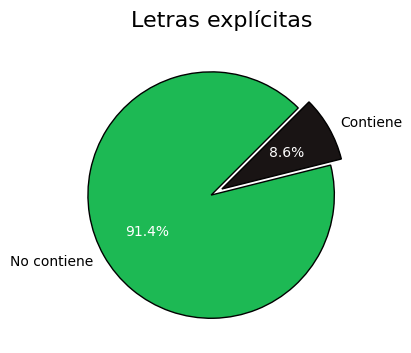

In [25]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df.groupby('explicit').size(), labels = ('No contiene', 'Contiene'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Letras explícitas', fontsize = 16)
# plt.savefig('Letras explicitas.jpg', dpi = 300)
plt.show()

Se encuentra que el 8.6 % de las canciones poseen letras explíctas. Esta es otra variable a considerar, filtrar las canciones no explícitas de las explícitas es de utilidad para padres que buscan no exponer a sus hijos de corta edad a letras no aptas para menores.

## 12. Evolucion con el tiempo <a class="anchor" id="tiempo"></a>
---

In [26]:
year, danceability, energy, tempo, valence = [], [], [], [], []

for i in range(1980, 2023):
    year.append(i)
    danceability.append(np.median(df_api.loc[df_api['year'] == i]['danceability']))
    energy.append(np.median(df_api.loc[df_api['year'] == i]['energy']))
    tempo.append(np.median(df_api.loc[df_api['year'] == i]['tempo']))
    valence.append(np.median(df_api.loc[df_api['year'] == i]['valence']))

df_api_avg = pd.DataFrame({'year':year, 'danceability':danceability, 'energy':energy, 'tempo':tempo, 'valence':valence})

Se creó un dataset nuevo, el cual está compuesto por las medianas de las variables "danceability", "energy", "tempo" y "valence" de las canciones de cada año del dataset obtenido por la API.

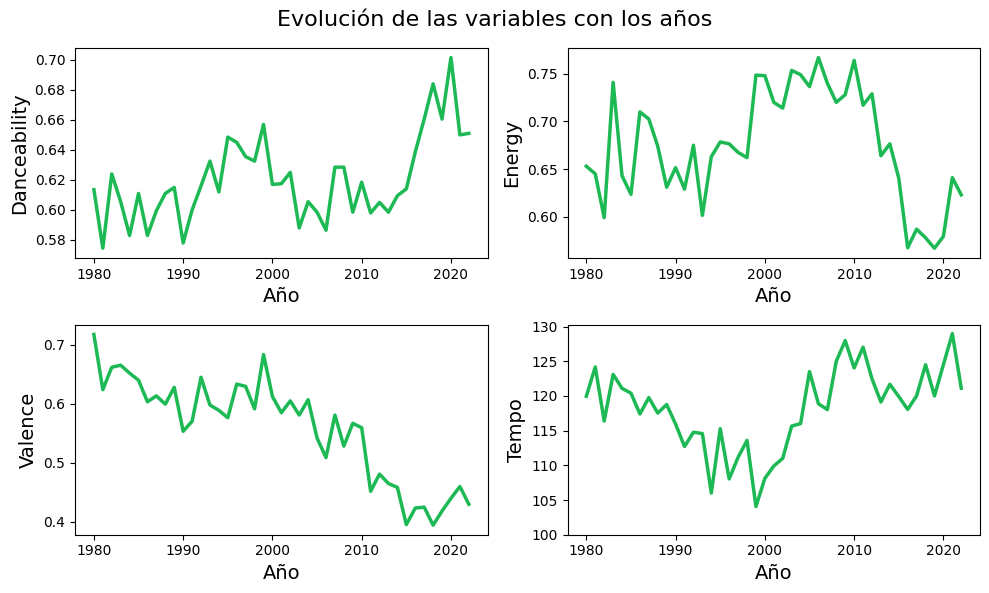

In [27]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))

axs[0,0].plot(df_api_avg['year'], df_api_avg['danceability'], c = '#1DB954', lw = 2.5)
axs[0,1].plot(df_api_avg['year'], df_api_avg['energy'], c = '#1DB954', lw = 2.5)
axs[1,0].plot(df_api_avg['year'], df_api_avg['valence'], c = '#1DB954', lw = 2.5)
axs[1,1].plot(df_api_avg['year'], df_api_avg['tempo'], c = '#1DB954', lw = 2.5)

variable = ['Danceability', 'Energy', 'Valence', 'Tempo']

for i, ax in enumerate(axs.flat):
    ax.set_xlabel('Año', fontsize = 14)
    ax.set_ylabel(f'{variable[i]}', fontsize = 14)

axs[1,1].set_yticks(np.arange(100, 131, 5))

fig.suptitle('Evolución de las variables con los años', fontsize = 16)

plt.tight_layout()
# plt.savefig('Evolucion.jpg', dpi = 300)
plt.show()

Se observa que estas variables tuvieron cambios progresivos con el pasar de los años. En líneas generales, parece huber un cambio en las tendencias de las variables "danceability", "energy" y "valence" en los años 2010. En dicha década las canciones aumentaron las medianas de dichas variables, probablemente debido al éxito relativamente reciente de los géneros de música pop, hip-hop, latino y similares. Por otro lado, la variable "tempo" tuvo un notable aumento en el año 2000 para luego estancarse durante el rango 2005 al 2020.

## 13. Insights y recomendaciones <a class="anchor" id="insights"></a>
---

En función del analisis exploratorio del dataset se presentan los siguientes insights:

- Las canciones más populares pertenecen, en su gran mayoría, a los géneros pop, hip-hop y latino. En consecuencia, los artistas más populares son los que se dedican a los mencionados géneros.

- Además de los artistas más populares del momento existen artistas de décadas pasadas que permanecen vigentes y escuchados actualmente.

- Las canciones más elegidas por los usuarios son aquellas que transmiten mayor energía, emociones típicamente calificadas como positivas y voluntad de bailar. Sólo el 15 % de las canciones del dataset original son consideradas bailables.

- Casi con exclusividad las piezas musicales poseen voz cantada, sólo un número menor poseen palabra hablada.

- Menos del 9 % de las canciones poseen letras explícitas, no aptas para menores.

- Las variables que caracterizan a las canciones evolucionan con el pasar de los años. En la década del 2010 se detectaron cambios de tendencia en estas variables.

Y a su vez, en respuesta a los insights, se plantean las recomendaciones que continúan:

- Para atraer a oyentes jóvenes, entre 18 y 30 años, la plataforma debe poseer un amplio repertorio de canciones bailables, que transmitan emociones positivas y energía. Los géneros pop, hip-hop, latinos, entre otros, gozan de popularidad puesto que cumplen con las características mencionadas.

- Se recomienda explorar la posibilidad de ofrecer un servicio diferenciado para menores de edad. Este rango etario posee preferencias musicales similares a los jóvenes de entre 18 y 30 años. Este servicio diferenciado debe poseer la opción de que los padres puedan filtrar las canciones con letras violentas y/o explícitas.

- Por otro lado, a los fines de convencer y/o retener la audiencia de más edad, el servicio Spotify debe ofrecer canciones de artistas consagrados que permanecen vigentes. Artistas tales como Metallica, Michael Jackson, The Smith, 2Pac, Eminem, etcétera, son de géneros dispares y de diferentes décadas pero que figuran en los tops de popularidad.

- Géneros musicales que tuvieron su pico de popularidad en décadas pasadas pero que siguen siendo muy escuchados podrían beneficiarse del influjo de artistas nuevos que siguen produciendo música en estos géneros. Spotify podría dar más visibilidad a dichos artistas para ofrecer novedades para atraer a posibles clientes que gusten de dicha música.